### Consider Roberts, Prewitt, and Sobel filters and Laplacian filters. Apply these fil- ters on barbara.jpg and make observations upon comparing their outputs. Com- pare these with the output of Canny edge detector on the same image. 

In [8]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [9]:
i1 = './A2_resources/barbara.jpg'

img1 = cv2.imread(i1, 0)
img1 = img1.astype(np.uint16)

In [10]:
# Prewitt filter
prewitt1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Sobel filter
sobel1 = np.matrix([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel2 = np.matrix([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Roberts filter
roberts1 = np.matrix([[0, 1], [-1, 0]])
roberts2 = np.matrix([[1, 0], [0, -1]])

# Laplacian filter
laplacian1 = np.matrix([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian2 = np.matrix([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

In [11]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize] 

In [12]:
def conv(img, mat):
    a1, a2 = img.shape
    
    b1, b2 = mat.shape
    
    mat_f = np.array(mat.flatten())
    imcol = im2col(img, (a1-b1+1,a2-b2+1))
    x = np.multiply(imcol, mat_f)
    y = np.sum(x, axis = 1)
    y = y.reshape(a1-b1+1, a2-b2+1)
    
    return y

In [13]:
image_prewitt = np.clip(conv(img1, prewitt1) + conv(img1, prewitt2), 0, 255)

image_sobel = np.clip(conv(img1, sobel1) + conv(img1, sobel2), 0, 255)

image_roberts = np.clip(conv(img1, roberts1) + conv(img1, roberts2), 0, 255)

image_laplacian = np.clip(conv(img1, laplacian2), 0, 255)

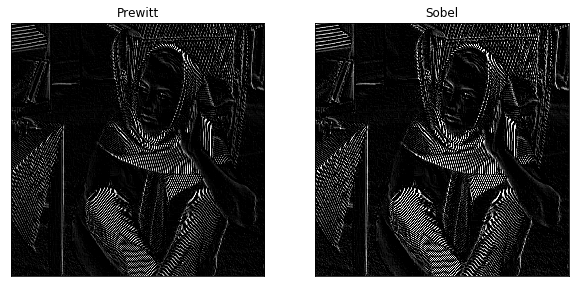

In [14]:
fig = plt.figure(figsize=[10, 10])
plt.subplot(121),plt.imshow(image_prewitt, cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_sobel, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

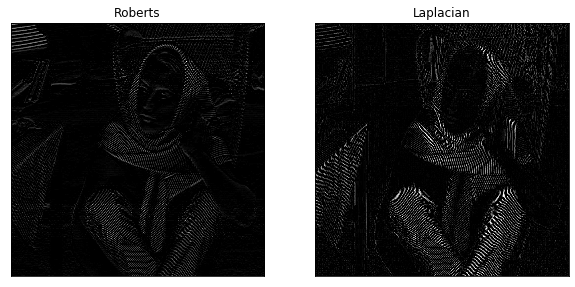

In [15]:
fig = plt.figure(figsize=[10, 10])
plt.subplot(121),plt.imshow(image_roberts, cmap = 'gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

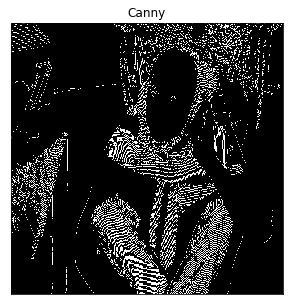

In [16]:
fig = plt.figure(figsize=[5, 5])
img1 = cv2.imread(i1, 0)
image_canny = cv2.Canny(img1, 50, 200)

# hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
# plt.subplot(121),plt.plot(hist1)
# plt.title('barbara.jpg')
plt.imshow(image_canny, cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.show()

- Prewitt and Sobel give the best results as they display the finer details like the facial features etc.
